# 11.1 Introduction

There is no silver bullet to getting info from the internet.
The coding requirements in these notes start easy and will gradually become more demanding. We will cover the following web scraping techniques:

1. Pandas
2. APIs
3. Scraping static webpages with BeautifulSoup
4. Scraping dynamic wepages with Selenium


## 11.1.1 Pandas

The Pandas library has a very useful webscraping command: `read_html`. The `read_html` command works for webpages that contain tables that are particularly well behaved. Let's see an example: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

At first glance, it seems that there are three tables in this Wikipedia page:
1. data from the IMF
2. data from the World Bank
3. data from the UN

Let's see which tables pandas recognizes.

In [3]:
# Scrape all tables from Wikipedia page
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
df_list = pd.read_html(url)

# Check number of tables on the page
print(len(df_list))

10


Apparently Pandas has found 10 tables in this webpage. Let's see what is their content.

In [4]:
# Check headers of each table
for df in df_list: print(df.shape)

(1, 1)
(1, 3)
(602, 3)
(193, 3)
(191, 3)
(213, 3)
(7, 2)
(9, 2)
(12, 2)
(2, 2)


It seems that pandas has found many more tables that we could see. The ones that are of interest to us are probably the 3rd, 4th and 5th. But that are the others? Let's look at the them.

In [5]:
# Check first
df_list[0].head()

,0
0,Largest economies by nominal GDP in 2019[1]


In [6]:
# Check second
df_list[1].head()

,0,1,2
0,>$20 trillion $10–$20 trillion $5–$10 trillion...,$750 billion–$1 trillion $500–$750 billion $25...,$50–$100 billion $25–$50 billion $5–$25 billio...


In [11]:
# Check third
df_list[2].head()

,0,1,2
0,Per the International Monetary Fund (2019 esti...,Per the World Bank (2018)[20],Per the United Nations (2017)[21][22]
1,Rank Country/Territory GDP(US$million) World[...,Rank Country/Territory GDP(US$million) World ...,Rank Country/Territory GDP(US$million) World[...
2,Rank,Country/Territory,GDP(US$million)
3,NaN,World[19],87265226
4,1,United States,21439453


Apparently, the first two are simply picture captions while the third is some sort of larger table that encompasses the other three.

In [12]:
# Check fourth
df_list[3].head()

,Rank,Country/Territory,GDP(US$million)
0,NaN,World[19],87265226
1,1,United States,21439453
2,—,European Union[23][n 1],18705132
3,2,China[n 2],14140163
4,3,Japan,5154475


This is clearly what we were looking for. A part from the footnotes, the table is already clean and organized.

If we knew the name of the table, we could directly retrieve it. However, we will see more about it in the next lecture.

## 11.1.2 Libraries

Sometimes, there are libraries that are already written down to do the scraping for you. Each one is tailored for a specific website and they are usually userwritten and prone to bugs and errors. However, they are often efficient and save you the time to worry about getting around some website-specific issues.

One example is the `pytrends` library for scraping Google Trends. Let's first install it

```python
pip3 install pytrends
```

Let's see how it works. Imagine we want to do the following search:
- words "python", "matlab", "stata"
- the the second half of in 2019
- daily
- in the US

We can get more details on how pytrends works [here](https://github.com/GeneralMills/pytrends#historical-hourly-interest). The important thing to know is that if you query a time period of more than 200 days, Google will give you weekly results, instead of daily.

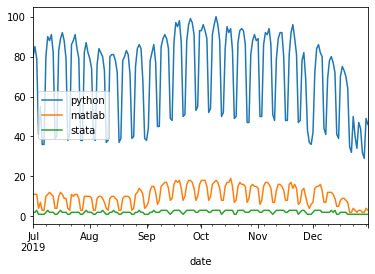

In [14]:
# Pytrends search
from pytrends.request import TrendReq

# Set parameters
words = ['python', 'matlab', 'stata']
timeframe = '2019-07-01 2019-12-31'
country = 'US'

# Get data
pytrend = TrendReq()
pytrend.build_payload(kw_list=words, timeframe=timeframe, geo=country)
df_trends = pytrend.interest_over_time()

# Plot
trends_plot = df_trends.plot.line()

Apparently people don't code during the weekend....

## 11.1.3 APIs

From Wikipedia 

> An application programming interface (API) is an interface or communication protocol between different parts of a computer program intended to simplify the implementation and maintenance of software.

In practice, it means that the are some webpages that are structured not to be user-readable but to be computer-readable. Let's see one example.

Google provides many APIs for its services. However, they now all need identification, which means that you have to log in into your Google account and request an API key from there. This allows Google to monitor your behavior since the number of API requests is limited and beyond a certain treshold, one need to pay (a lot).

There are however some free APIs. One 

Let's have a look at one of these: zippopotam. Zippopotam lets you retrieve location information from a zip code in the US. Other countries are supported as well. 

In [15]:
# Let's search the department locaiton
import requests

zipcode = '90210'
url = 'https://api.zippopotam.us/us/'+zipcode

response = requests.get(url)
data = response.json()
data

{'post code': '90210',
 'country': 'United States',
 'country abbreviation': 'US',
 'places': [{'place name': 'Beverly Hills',
   'longitude': '-118.4065',
   'state': 'California',
   'state abbreviation': 'CA',
   'latitude': '34.0901'}]}

Data is in JSON (JavaScript Object Notation) format which is basically a nested dictionary-list format. Indeed, we see that in our case, data is a dictionary where the last elements is a list with one element - another dictionary.

In [16]:
# Check type of value
for d in data.values():
    print(type(d))
    
# Check list length
print(len(data['places']))

# Check type of content of list
print(type(data['places'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'list'>
1
<class 'dict'>


The part that could be interesting to us is contained in the `places` category. We can easily extract it and transform it into a dataframe.

In [17]:
import pandas as pd 

# Add zipcode to data
data['places'][0]['zipcode'] = zipcode

# Export data
df = pd.DataFrame(data['places'])
df

,place name,longitude,state,state abbreviation,latitude,zipcode
0,Beverly Hills,-118.4065,California,CA,34.0901,90210


## Bibliography

- Mitchell, R. (2018). *Web scraping with Python: Collecting more data from the modern web*. O'Reilly Media, Inc.
- Vanden Broucke, S., & Baesens, B. (2018). *Practical Web scraping for data science*. New York, NY: Apress.